In [1]:
# Configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

# Extracting the compressed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 90% 147M/163M [00:00<00:00, 227MB/s]
100% 163M/163M [00:00<00:00, 200MB/s]
The dataset is extracted


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow
from tensorflow import keras

In [3]:
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [4]:
keras.utils.set_random_seed(7)
random.seed(7)
np.random.seed(7)
tensorflow.random.set_seed(7)

In [5]:
data=[]
categories=['with_mask','without_mask']
for category in categories:
    path=os.path.join('/content/data',category)

    if category == 'with_mask':
        label=0
    else:
        label=1

    for file in os.listdir(path):
        img_path=os.path.join(path,file)
        img=cv2.imread(img_path)
        # img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img=cv2.resize(img,(128,128))
        data.append([img,label])

random.Random(4).shuffle(data)

X=[]
y=[]
for feature,label in data:
    X.append(feature)
    y.append(label)
X=np.array(X)
y=np.array(y)
X=X/255
data=None

X.shape,y.shape

((7553, 128, 128, 3), (7553,))

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.shape,y_train.shape

((6042, 128, 128, 3), (6042,))

### resnet

In [7]:
from keras import Sequential
from keras.layers import Dense,Flatten,GlobalAveragePooling2D,BatchNormalization,Dropout


In [8]:
from keras.applications import ResNet152V2
from keras.layers import  Flatten, BatchNormalization, Dense, Dropout
from keras.models import Sequential

In [9]:
from keras.layers import Input
# Define input shape
input_shape = (128, 128, 3)

# Create base model
base = ResNet152V2(include_top=False, weights="imagenet", input_tensor=Input(shape=input_shape))

234545216/234545216 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [10]:
#option 1
base.trainable=False

In [11]:
model=Sequential()
model.add(base)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(1024,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
epochs=10
history=model.fit(X_train,y_train,epochs=epochs,validation_data=(X_test,y_test),verbose=1)

Epoch 1/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 80s 259ms/step - accuracy: 0.9318 - loss: 0.6909 - val_accuracy: 0.9735 - val_loss: 0.0943
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 39s 93ms/step - accuracy: 0.9885 - loss: 0.0769 - val_accuracy: 0.9775 - val_loss: 0.1700
Epoch 3/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.9972 - loss: 0.0156 - val_accuracy: 0.9762 - val_loss: 0.2608
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 20s 94ms/step - accuracy: 0.9966 - loss: 0.0284 - val_accuracy: 0.9768 - val_loss: 0.3081
Epoch 5/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 93ms/step - accuracy: 0.9971 - loss: 0.0219 - val_accuracy: 0.9689 - val_loss: 0.4861
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.9962 - loss: 0.1418 - val_accuracy: 0.9729 - val_loss: 0.5665
Epoch 7/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.9983 - loss: 0.0248 - val_accuracy: 0.9762 - val_loss: 0.5032
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.9930 - loss: 0.0538 -

In [14]:
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

In [15]:
y_prob=model.predict(X_test)
y_pred=np.where(y_prob>0.5,1,0)

48/48 ━━━━━━━━━━━━━━━━━━━━ 19s 219ms/step


In [16]:
acc=accuracy_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print(f"accuracy is {acc*100:.2f}%")
print(f"recall is {recall*100:.2f}%")
print(cm)

accuracy is 97.75%
recall is 97.99%
[[746  19]
 [ 15 731]]


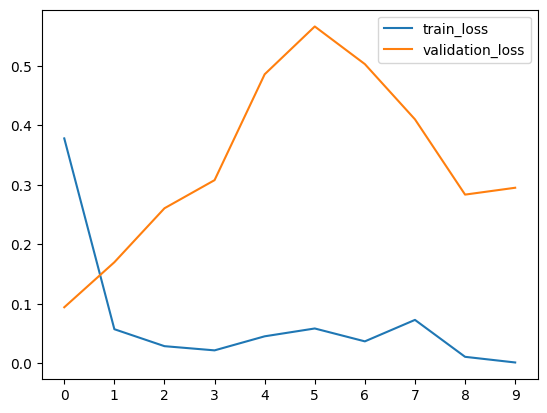

In [17]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='validation_loss')
plt.legend()
plt.xticks(np.arange(0, epochs, 1))
plt.show()

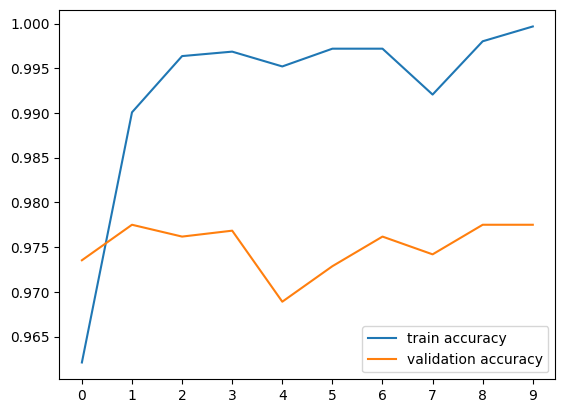

In [18]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.legend()
plt.xticks(np.arange(0, epochs, 1))
plt.show()